# **Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **STEP 1: Set up**

In [2]:
!pip install matplotlib==3.1.3
!pip install osmnet
!pip install folium

!pip install rtree
!pip install pygeos
!pip install selenium
!pip install geojson
!pip install geopandas

!pip install cloudmersive_convert_api_client
!apt-get update
!apt install chromium-chromedriver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 6.1 MB/s 
     |████████████████████████████████| 16.7 MB 42.0 MB/s 
     |████████████████████████████████| 6.3 MB 39.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 995 kB 5.2 MB/s 
     |████████████████████████████████| 140 kB 37.1 MB/s 
     |████████████████████████████████| 384 kB 48.9 MB/s 
     |████████████████████████████████| 58 k

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import json
from geopandas.tools import sjoin
import folium
from folium import plugins
import io
import os
from PIL import Image
from selenium import webdriver
import time
import random
import sys
import cv2
from google.colab.patches import cv2_imshow

In [4]:
%cd /content/drive/MyDrive/03. UIT Document/COMPUTER SCIENCE - Deep Learning/Deep Learning techniques and Applications

/content/drive/MyDrive/03. UIT Document/COMPUTER SCIENCE - Deep Learning/Deep Learning techniques and Applications


# **STEP 2: Clone data**

In [5]:
# !git clone https://github.com/CityScope/CSL_HCMC

# **STEP 3: Load population data**

In [6]:
path = './CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp'

In [7]:
df = gpd.read_file(path)
df

Dist_Name Dist_ID     Level  Pop_2009  Pop_2010  Pop_2011  Pop_2012  \
0    District 1     760  District  180225.0  187435.0  187419.0  190943.0   
1    District 3     770  District  190553.0  188945.0  190631.0  191580.0   
2    District 4     773  District  180980.0  183261.0  184711.0  185649.0   
3    District 6     775  District  249329.0  253474.0  254212.0  257865.0   
4    District 7     778  District  244276.0  274828.0  268483.0  266633.0   
5   District 10     771  District  230345.0  232450.0  236336.0  237086.0   
6   District 11     772  District  226854.0  232536.0  236443.0  233499.0   
7     Phu Nhuan     768  District  174535.0  175175.0  177242.0  179917.0   
8      Tan Binh     766  District  421724.0  430436.0  434298.0  440351.0   
9    Binh Thanh     765  District  457362.0  470054.0  484135.0  484423.0   
10       Go Vap     764  District  522690.0  548145.0  566216.0  588606.0   
11      Tan Phu     767  District  398102.0  407924.0  423074.0  439099.0   
12     Binh Tan     777  District  572132.0  595335.0  616777.0  639088.0   
13       Cu Chi     783  District  343155.0  355822.0  365779.0  381796.0   
14   Binh Chanh     785  District  420109.0  447291.0  469517.0  491900.0   
15      Thu Duc     762  District  442177.0  455899.0  478900.0  500850.0   
16   District 9     763  District  256257.0  263486.0  271537.0  276432.0   
17   District 2     769  District  147490.0  140621.0  137749.0  134131.0   
18       Nha Be     786  District  101074.0  103793.0  110958.0  119416.0   
19      Can Gio     787  District   68846.0   70697.0   71145.0   72167.0   
20   District 8     776  District  408772.0  418961.0  425414.0  430881.0   
21   District 5     774  District  171452.0  174154.0  176824.0  176890.0   
22  District 12     761  District  405360.0  427083.0  455881.0  475824.0   
23      Hoc Mon     784  District  349065.0  358640.0  366502.0  396763.0   

    Pop_2013  Pop_2014  Pop_2015  ...   Den_2012   Den_2013   Den_2014  \
0   197421.0  200297.0  193632.0  ...  24749.600  25589.300  25962.100   
1   193206.0  193694.0  196333.0  ...  38897.100  39227.200  39326.300   
2   185808.0  187157.0  186727.0  ...  44428.400  44466.500  44789.300   
3   266121.0  257183.0  258945.0  ...  36105.700  37261.600  36010.200   
4   280743.0  296757.0  310178.0  ...   7563.590   7963.850   8418.120   
5   239180.0  238755.0  238558.0  ...  41535.600  41902.500  41828.000   
6   227860.0  228030.0  230596.0  ...  45502.900  44404.000  44437.100   
7   180456.0  182821.0  182477.0  ...  36793.300  36903.500  37387.100   
8   443061.0  448989.0  455029.0  ...  19627.100  19747.900  20012.100   
9   482833.0  485772.0  487985.0  ...  23307.600  23231.100  23372.500   
10  604143.0  620078.0  634146.0  ...  29854.000  30642.000  31450.300   
11  448584.0  452044.0  464493.0  ...  27434.200  28026.800  28243.000   
12  655244.0  672309.0  686474.0  ...  12310.500  12621.800  12950.500   
13  383981.0  390722.0  403038.0  ...    878.246    883.272    898.778   
14  514242.0  551545.0  591451.0  ...   1944.790   2033.120   2180.610   
15  507650.0  517772.0  528413.0  ...  10487.800  10630.200  10842.200   
16  284473.0  284990.0  290620.0  ...   2419.330   2489.700   2494.230   
17  140436.0  140288.0  147168.0  ...   2685.950   2812.210   2809.250   
18  126062.0  132034.0  139225.0  ...   1188.340   1254.480   1313.900   
19   72776.0   74386.0   74960.0  ...    100.549    101.397    103.640   
20  430942.0  430580.0  431969.0  ...  22497.000  22500.200  22481.300   
21  176336.0  171562.0  178615.0  ...  41366.500  41236.900  40120.500   
22  489511.0  499569.0  510326.0  ...   9016.090   9275.440   9466.020   
23  408683.0  414795.0  422471.0  ...   3634.000   3743.180   3799.160   

     Den_2015   Den_2016   Den_2017    Den_2019     Shape_Leng    Shape_Area  \
0   25098.200  27022.100  27377.900  18486.8000   15274.835115  7.714899e+06   
1   39862.100  40221.700  40422.900  38652.5000   12182.058264  4.925

# **STEP 4: Load user's clicks data**

In [8]:
data_click = gpd.read_file('click_data.json')
data_click

dbh                    geometry
0        1  POINT (106.71136 10.85113)
1        1  POINT (106.71695 10.74449)
2        1  POINT (106.66315 10.83289)
3        1  POINT (106.66267 10.83339)
4        1  POINT (106.65977 10.83729)
...    ...                         ...
83670    1  POINT (106.65664 10.84339)
83671    1  POINT (106.75180 10.85276)
83672    1  POINT (106.73189 10.73154)
83673    1  POINT (106.67640 10.82388)
83674    1  POINT (106.67373 10.82236)

[83675 rows x 2 columns]

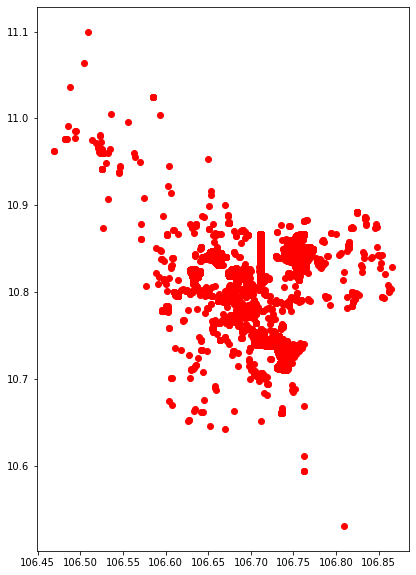

In [9]:
data_click.plot(figsize=(10,10), color='red')

# **STEP 5: 5 districts with the fastest population density growth**

In [10]:
df['Den_growth'] = df['Den_2019'] / df['Den_2017']

In [11]:
df_top_five_den_growth = df.nlargest(5, 'Den_growth')
df_top_five_den_growth

Dist_Name Dist_ID     Level  Pop_2009  Pop_2010  Pop_2011  Pop_2012  \
16   District 9     763  District  256257.0  263486.0  271537.0  276432.0   
23      Hoc Mon     784  District  349065.0  358640.0  366502.0  396763.0   
18       Nha Be     786  District  101074.0  103793.0  110958.0  119416.0   
22  District 12     761  District  405360.0  427083.0  455881.0  475824.0   
17   District 2     769  District  147490.0  140621.0  137749.0  134131.0   

    Pop_2013  Pop_2014  Pop_2015  ...  Den_2013  Den_2014  Den_2015  Den_2016  \
16  284473.0  284990.0  290620.0  ...   2489.70   2494.23   2543.50   2592.32   
23  408683.0  414795.0  422471.0  ...   3743.18   3799.16   3869.46   3977.58   
18  126062.0  132034.0  139225.0  ...   1254.48   1313.90   1385.46   1552.41   
22  489511.0  499569.0  510326.0  ...   9275.44   9466.02   9669.85   9968.06   
17  140436.0  140288.0  147168.0  ...   2812.21   2809.25   2947.02   3080.46   

    Den_2017  Den_2019    Shape_Leng    Shape_Area  \
16   2719.58   3474.59  53139.220230  1.142649e+08   
23   4085.48   4966.47  65955.793966  1.091744e+08   
18   1771.22   2058.29  67540.905029  1.004901e+08   
22  10403.90  11750.80  47703.394094  5.277342e+07   
17   3243.16   3609.98  39592.970451  4.993869e+07   

                                             geometry  Den_growth  
16  POLYGON ((701125.957 1205414.891, 701162.391 1...    1.277620  
23  POLYGON ((673061.206 1208548.077, 673094.550 1...    1.215639  
18  POLYGON ((688444.826 1185726.125, 688568.759 1...    1.162075  
22  POLYGON ((685183.891 1205265.848, 685198.395 1...    1.129461  
17  POLYGON ((690496.729 1195354.084, 690716.888 1...    1.113106  

[5 rows x 27 columns]

# **STEP 6: Filter user's clicks data using `sjoin`**

In [12]:
data_click_sjoin = gpd.sjoin(data_click.to_crs(epsg=32648), df_top_five_den_growth, how='left', op='within')
data_click_sjoin

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


dbh                        geometry  index_right Dist_Name Dist_ID  \
0        1  POINT (687074.226 1200044.747)          NaN       NaN     NaN   
1        1  POINT (687752.360 1188252.815)          NaN       NaN     NaN   
2        1  POINT (681813.990 1197998.313)          NaN       NaN     NaN   
3        1  POINT (681761.573 1198052.679)          NaN       NaN     NaN   
4        1  POINT (681442.508 1198483.069)          NaN       NaN     NaN   
...    ...                             ...          ...       ...     ...   
83670    1  POINT (681095.997 1199156.208)          NaN       NaN     NaN   
83671    1  POINT (691495.565 1200249.907)          NaN       NaN     NaN   
83672    1  POINT (689394.818 1186828.972)          NaN       NaN     NaN   
83673    1  POINT (683268.233 1197009.824)          NaN       NaN     NaN   
83674    1  POINT (682977.401 1196839.735)          NaN       NaN     NaN   

      Level  Pop_2009  Pop_2010  Pop_2011  Pop_2012  ...  Den_2012  Den_2013  \
0       NaN       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN  ...       NaN       NaN   
3       NaN       NaN       NaN       NaN       NaN  ...       NaN       NaN   
4       NaN       NaN       NaN       NaN       NaN  ...       NaN       NaN   
...     ...       ...       ...       ...       ...  ...       ...       ...   
83670   NaN       NaN       NaN       NaN       NaN  ...       NaN       NaN   
83671   NaN       NaN       NaN       NaN       NaN  ...       NaN       NaN   
83672   NaN       NaN       NaN       NaN       NaN  ...       NaN       NaN   
83673   NaN       NaN       NaN       NaN       NaN  ...       NaN       NaN   
83674   NaN       NaN       NaN       NaN       NaN  ...       NaN       NaN   

       Den_2014  Den_2015  Den_2016  Den_2017  Den_2019  Shape_Leng  \
0           NaN       NaN       NaN       NaN       NaN         NaN   
1           NaN       NaN       NaN       NaN       NaN         NaN   
2           NaN       NaN       NaN       NaN       NaN         NaN   
3           NaN       NaN       NaN       NaN       NaN         NaN   
4           NaN       NaN       NaN       NaN       NaN         NaN   
...         ...       ...       ...       ...       ...         ...   
83670       NaN       NaN       NaN       NaN       NaN         NaN   
83671       NaN       NaN       NaN       NaN       NaN         NaN   
83672       NaN       NaN       NaN       NaN       NaN         NaN   
83673       NaN       NaN       NaN       NaN       NaN         NaN   
83674       NaN       NaN       NaN       NaN       NaN         NaN   

       Shape_Area  Den_growth  
0             NaN         NaN  
1             NaN         NaN  
2             NaN         NaN  
3             NaN         NaN  
4             NaN         NaN  
...           ...         ...  
83670         NaN         NaN  
83671         NaN         NaN  
83672         NaN         NaN  
83673         NaN         NaN  
83674         NaN         NaN  

[83675 rows x 29 columns]

In [13]:
data_click_sjoin = data_click_sjoin.dropna()
data_click_sjoin

dbh                        geometry  index_right    Dist_Name Dist_ID  \
126      1  POINT (672111.261 1206262.526)         23.0      Hoc Mon     784   
222      1  POINT (692922.233 1197659.444)         16.0   District 9     763   
283      1  POINT (692816.352 1171680.991)         18.0       Nha Be     786   
342      1  POINT (684537.173 1200609.096)         22.0  District 12     761   
368      1  POINT (687053.741 1200187.330)         22.0  District 12     761   
...    ...                             ...          ...          ...     ...   
83292    1  POINT (687067.086 1200147.582)         22.0  District 12     761   
83372    1  POINT (692610.000 1197108.643)         16.0   District 9     763   
83394    1  POINT (688958.614 1193146.656)         17.0   District 2     769   
83466    1  POINT (687045.094 1201723.781)         22.0  District 12     761   
83483    1  POINT (687077.077 1200121.090)         22.0  District 12     761   

          Level  Pop_2009  Pop_2010  Pop_2011  Pop_2012  ...  Den_2012  \
126    District  349065.0  358640.0  366502.0  396763.0  ...   3634.00   
222    District  256257.0  263486.0  271537.0  276432.0  ...   2419.33   
283    District  101074.0  103793.0  110958.0  119416.0  ...   1188.34   
342    District  405360.0  427083.0  455881.0  475824.0  ...   9016.09   
368    District  405360.0  427083.0  455881.0  475824.0  ...   9016.09   
...         ...       ...       ...       ...       ...  ...       ...   
83292  District  405360.0  427083.0  455881.0  475824.0  ...   9016.09   
83372  District  256257.0  263486.0  271537.0  276432.0  ...   2419.33   
83394  District  147490.0  140621.0  137749.0  134131.0  ...   2685.95   
83466  District  405360.0  427083.0  455881.0  475824.0  ...   9016.09   
83483  District  405360.0  427083.0  455881.0  475824.0  ...   9016.09   

       Den_2013  Den_2014  Den_2015  Den_2016  Den_2017  Den_2019  \
126     3743.18   3799.16   3869.46   3977.58   4085.48   4966.47   
222     2489.70   2494.23   2543.50   2592.32   2719.58   3474.59   
283     1254.48   1313.90   1385.46   1552.41   1771.22   2058.29   
342     9275.44   9466.02   9669.85   9968.06  10403.90  11750.80   
368     9275.44   9466.02   9669.85   9968.06  10403.90  11750.80   
...         ...       ...       ...       ...       ...       ...   
83292   9275.44   9466.02   9669.85   9968.06  10403.90  11750.80   
83372   2489.70   2494.23   2543.50   2592.32   2719.58   3474.59   
83394   2812.21   2809.25   2947.02   3080.46   3243.16   3609.98   
83466   9275.44   9466.02   9669.85   9968.06  10403.90  11750.80   
83483   9275.44   9466.02   9669.85   9968.06  10403.90  11750.80   

         Shape_Leng    Shape_Area  Den_growth  
126    65955.793966  1.091744e+08    1.215639  
222    53139.220230  1.142649e+08    1.277620  
283    67540.905029  1.004901e+08    1.162075  
342    47703.394094  5.277342e+07    1.129461  
368    47703.394094  5.277342e+07    1.129461  
...             ...           ...         ...  
83292  47703.394094  5.277342e+07    1.129461  
83372  53139.220230  1.142649e+08    1.277620  
83394  39592.970451  4.993869e+07    1.113106  
83466  47703.394094  5.277342e+07    1.129461  
83483  47703.394094  5.277342e+07    1.129461  

[900 rows x 29 columns]

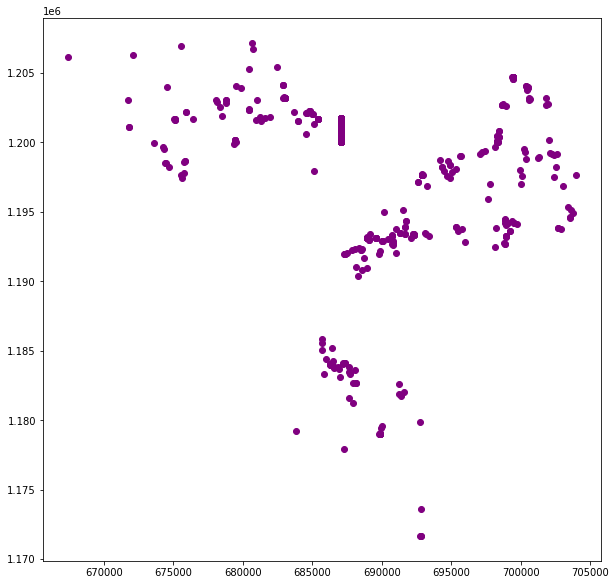

In [14]:
data_click_sjoin['geometry'].plot(figsize=(10,10), color='purple')

# **STEP 7: K Mean Clustering**

In [15]:
from sklearn.cluster import KMeans
def k_means_cluster(df, dist, n_clusters=20):
    table = df[df['Dist_Name'] == dist]
    k_means = KMeans(n_clusters, random_state=1234)
    x = pd.Series(table['geometry'].apply(lambda p: p.x)) 
    y = pd.Series(table['geometry'].apply(lambda p: p.y))
    point = np.column_stack((x, y))
    y_means = k_means.fit_predict(point)
    table['cluster'] = y_means
    return table

In [16]:
top_five_den_growth = np.array(df_top_five_den_growth['Dist_Name'])
top_five_den_growth

array(['District 9', 'Hoc Mon', 'Nha Be', 'District 12', 'District 2'],
      dtype=object)

In [17]:
kmeans_top_five_den_growth = [k_means_cluster(data_click_sjoin, district, 20) for district in top_five_den_growth]

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

## **District 9**

In [18]:
kmeans_district9 = kmeans_top_five_den_growth[0]
kmeans_district9

dbh                        geometry  index_right   Dist_Name Dist_ID  \
222      1  POINT (692922.233 1197659.444)         16.0  District 9     763   
429      1  POINT (695991.169 1192822.430)         16.0  District 9     763   
1316     1  POINT (698836.877 1192704.024)         16.0  District 9     763   
1381     1  POINT (692913.762 1197663.315)         16.0  District 9     763   
2129     1  POINT (698955.307 1193250.694)         16.0  District 9     763   
...    ...                             ...          ...         ...     ...   
81983    1  POINT (701841.824 1203175.800)         16.0  District 9     763   
82069    1  POINT (694885.523 1197454.318)         16.0  District 9     763   
82657    1  POINT (697455.530 1199372.342)         16.0  District 9     763   
83095    1  POINT (700309.979 1199276.144)         16.0  District 9     763   
83372    1  POINT (692610.000 1197108.643)         16.0  District 9     763   

          Level  Pop_2009  Pop_2010  Pop_2011  Pop_2012  ...  Den_2013  \
222    District  256257.0  263486.0  271537.0  276432.0  ...    2489.7   
429    District  256257.0  263486.0  271537.0  276432.0  ...    2489.7   
1316   District  256257.0  263486.0  271537.0  276432.0  ...    2489.7   
1381   District  256257.0  263486.0  271537.0  276432.0  ...    2489.7   
2129   District  256257.0  263486.0  271537.0  276432.0  ...    2489.7   
...         ...       ...       ...       ...       ...  ...       ...   
81983  District  256257.0  263486.0  271537.0  276432.0  ...    2489.7   
82069  District  256257.0  263486.0  271537.0  276432.0  ...    2489.7   
82657  District  256257.0  263486.0  271537.0  276432.0  ...    2489.7   
83095  District  256257.0  263486.0  271537.0  276432.0  ...    2489.7   
83372  District  256257.0  263486.0  271537.0  276432.0  ...    2489.7   

       Den_2014  Den_2015  Den_2016  Den_2017  Den_2019   Shape_Leng  \
222     2494.23    2543.5   2592.32   2719.58   3474.59  53139.22023   
429     2494.23    2543.5   2592.32   2719.58   3474.59  53139.22023   
1316    2494.23    2543.5   2592.32   2719.58   3474.59  53139.22023   
1381    2494.23    2543.5   2592.32   2719.58   3474.59  53139.22023   
2129    2494.23    2543.5   2592.32   2719.58   3474.59  53139.22023   
...         ...       ...       ...       ...       ...          ...   
81983   2494.23    2543.5   2592.32   2719.58   3474.59  53139.22023   
82069   2494.23    2543.5   2592.32   2719.58   3474.59  53139.22023   
82657   2494.23    2543.5   2592.32   2719.58   3474.59  53139.22023   
83095   2494.23    2543.5   2592.32   2719.58   3474.59  53139.22023   
83372   2494.23    2543.5   2592.32   2719.58   3474.59  53139.22023   

         Shape_Area  Den_growth  cluster  
222    1.142649e+08     1.27762        9  
429    1.142649e+08     1.27762        7  
1316   1.142649e+08     1.27762       14  
1381   1.142649e+08     1.27762        9  
2129   1.142649e+08     1.27762       14  
...             ...         ...      ...  
81983  1.142649e+08     1.27762        5  
82069  1.142649e+08     1.27762        3  
82657  1.142649e+08     1.27762        2  
83095  1.142649e+08     1.27762       16  
83372  1.142649e+08     1.27762        9  

[133 rows x 30 columns]

## **Hoc Mon**

In [19]:
kmeans_hocmon = kmeans_top_five_den_growth[1]
kmeans_hocmon

dbh                        geometry  index_right Dist_Name Dist_ID  \
126      1  POINT (672111.261 1206262.526)         23.0   Hoc Mon     784   
525      1  POINT (671764.357 1203022.582)         23.0   Hoc Mon     784   
7264     1  POINT (680460.834 1205295.745)         23.0   Hoc Mon     784   
7964     1  POINT (675829.208 1198649.148)         23.0   Hoc Mon     784   
12190    1  POINT (676435.163 1201677.273)         23.0   Hoc Mon     784   
17846    1  POINT (675908.795 1202177.483)         23.0   Hoc Mon     784   
18570    1  POINT (667436.273 1206172.271)         23.0   Hoc Mon     784   
18582    1  POINT (674243.012 1199667.184)         23.0   Hoc Mon     784   
21784    1  POINT (675102.103 1201610.154)         23.0   Hoc Mon     784   
23019    1  POINT (674521.508 1203997.271)         23.0   Hoc Mon     784   
30743    1  POINT (675563.485 1206963.876)         23.0   Hoc Mon     784   
34826    1  POINT (675905.042 1202180.528)         23.0   Hoc Mon     784   
49301    1  POINT (675789.890 1198616.236)         23.0   Hoc Mon     784   
49363    1  POINT (675090.345 1201643.308)         23.0   Hoc Mon     784   
50295    1  POINT (674456.140 1198517.658)         23.0   Hoc Mon     784   
51849    1  POINT (682428.263 1205397.260)         23.0   Hoc Mon     784   
52665    1  POINT (671784.145 1201083.095)         23.0   Hoc Mon     784   
52935    1  POINT (680629.173 1207184.418)         23.0   Hoc Mon     784   
55461    1  POINT (675087.864 1201641.110)         23.0   Hoc Mon     784   
58956    1  POINT (674289.666 1199506.329)         23.0   Hoc Mon     784   
64776    1  POINT (673614.293 1199952.237)         23.0   Hoc Mon     784   
66619    1  POINT (675810.595 1198640.843)         23.0   Hoc Mon     784   
66966    1  POINT (680737.302 1206722.101)         23.0   Hoc Mon     784   
68039    1  POINT (674373.745 1198536.280)         23.0   Hoc Mon     784   
68742    1  POINT (674698.379 1198250.051)         23.0   Hoc Mon     784   
74742    1  POINT (675081.312 1201660.014)         23.0   Hoc Mon     784   
79403    1  POINT (675078.086 1201659.997)         23.0   Hoc Mon     784   
82832    1  POINT (671809.938 1201098.321)         23.0   Hoc Mon     784   

          Level  Pop_2009  Pop_2010  Pop_2011  Pop_2012  ...  Den_2013  \
126    District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
525    District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
7264   District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
7964   District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
12190  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
17846  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
18570  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
18582  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
21784  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
23019  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
30743  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
34826  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
49301  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
49363  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
50295  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
51849  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
52665  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
52935  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
55461  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
58956  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
64776  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
66619  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
66966  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18 

## **Nha Be**

In [20]:
kmeans_nhabe = kmeans_top_five_den_growth[2]
kmeans_nhabe

dbh                        geometry  index_right Dist_Name Dist_ID  \
283      1  POINT (692816.352 1171680.991)         18.0    Nha Be     786   
5442     1  POINT (686332.369 1184008.652)         18.0    Nha Be     786   
6490     1  POINT (689880.368 1179037.708)         18.0    Nha Be     786   
7742     1  POINT (687690.324 1183454.509)         18.0    Nha Be     786   
7824     1  POINT (687376.299 1184122.411)         18.0    Nha Be     786   
...    ...                             ...          ...       ...     ...   
78177    1  POINT (687625.947 1181594.152)         18.0    Nha Be     786   
79274    1  POINT (686339.980 1184011.310)         18.0    Nha Be     786   
79400    1  POINT (692805.140 1171654.221)         18.0    Nha Be     786   
82321    1  POINT (689830.959 1179025.981)         18.0    Nha Be     786   
82402    1  POINT (685847.718 1183330.662)         18.0    Nha Be     786   

          Level  Pop_2009  Pop_2010  Pop_2011  Pop_2012  ...  Den_2013  \
283    District  101074.0  103793.0  110958.0  119416.0  ...   1254.48   
5442   District  101074.0  103793.0  110958.0  119416.0  ...   1254.48   
6490   District  101074.0  103793.0  110958.0  119416.0  ...   1254.48   
7742   District  101074.0  103793.0  110958.0  119416.0  ...   1254.48   
7824   District  101074.0  103793.0  110958.0  119416.0  ...   1254.48   
...         ...       ...       ...       ...       ...  ...       ...   
78177  District  101074.0  103793.0  110958.0  119416.0  ...   1254.48   
79274  District  101074.0  103793.0  110958.0  119416.0  ...   1254.48   
79400  District  101074.0  103793.0  110958.0  119416.0  ...   1254.48   
82321  District  101074.0  103793.0  110958.0  119416.0  ...   1254.48   
82402  District  101074.0  103793.0  110958.0  119416.0  ...   1254.48   

       Den_2014  Den_2015  Den_2016  Den_2017  Den_2019    Shape_Leng  \
283      1313.9   1385.46   1552.41   1771.22   2058.29  67540.905029   
5442     1313.9   1385.46   1552.41   1771.22   2058.29  67540.905029   
6490     1313.9   1385.46   1552.41   1771.22   2058.29  67540.905029   
7742     1313.9   1385.46   1552.41   1771.22   2058.29  67540.905029   
7824     1313.9   1385.46   1552.41   1771.22   2058.29  67540.905029   
...         ...       ...       ...       ...       ...           ...   
78177    1313.9   1385.46   1552.41   1771.22   2058.29  67540.905029   
79274    1313.9   1385.46   1552.41   1771.22   2058.29  67540.905029   
79400    1313.9   1385.46   1552.41   1771.22   2058.29  67540.905029   
82321    1313.9   1385.46   1552.41   1771.22   2058.29  67540.905029   
82402    1313.9   1385.46   1552.41   1771.22   2058.29  67540.905029   

         Shape_Area  Den_growth  cluster  
283    1.004901e+08    1.162075        2  
5442   1.004901e+08    1.162075        0  
6490   1.004901e+08    1.162075        1  
7742   1.004901e+08    1.162075        4  
7824   1.004901e+08    1.162075       12  
...             ...         ...      ...  
78177  1.004901e+08    1.162075        8  
79274  1.004901e+08    1.162075        0  
79400  1.004901e+08    1.162075        2  
82321  1.004901e+08    1.162075        1  
82402  1.004901e+08    1.162075       16  

[70 rows x 30 columns]

## **District 12**

In [21]:
kmeans_district12 = kmeans_top_five_den_growth[3]
kmeans_district12

dbh                        geometry  index_right    Dist_Name Dist_ID  \
342      1  POINT (684537.173 1200609.096)         22.0  District 12     761   
368      1  POINT (687053.741 1200187.330)         22.0  District 12     761   
473      1  POINT (687052.626 1201551.257)         22.0  District 12     761   
736      1  POINT (687071.213 1201163.089)         22.0  District 12     761   
867      1  POINT (687076.890 1200154.275)         22.0  District 12     761   
...    ...                             ...          ...          ...     ...   
83042    1  POINT (687068.092 1201717.273)         22.0  District 12     761   
83194    1  POINT (687061.011 1200061.265)         22.0  District 12     761   
83292    1  POINT (687067.086 1200147.582)         22.0  District 12     761   
83466    1  POINT (687045.094 1201723.781)         22.0  District 12     761   
83483    1  POINT (687077.077 1200121.090)         22.0  District 12     761   

          Level  Pop_2009  Pop_2010  Pop_2011  Pop_2012  ...  Den_2013  \
342    District  405360.0  427083.0  455881.0  475824.0  ...   9275.44   
368    District  405360.0  427083.0  455881.0  475824.0  ...   9275.44   
473    District  405360.0  427083.0  455881.0  475824.0  ...   9275.44   
736    District  405360.0  427083.0  455881.0  475824.0  ...   9275.44   
867    District  405360.0  427083.0  455881.0  475824.0  ...   9275.44   
...         ...       ...       ...       ...       ...  ...       ...   
83042  District  405360.0  427083.0  455881.0  475824.0  ...   9275.44   
83194  District  405360.0  427083.0  455881.0  475824.0  ...   9275.44   
83292  District  405360.0  427083.0  455881.0  475824.0  ...   9275.44   
83466  District  405360.0  427083.0  455881.0  475824.0  ...   9275.44   
83483  District  405360.0  427083.0  455881.0  475824.0  ...   9275.44   

       Den_2014  Den_2015  Den_2016  Den_2017  Den_2019    Shape_Leng  \
342     9466.02   9669.85   9968.06   10403.9   11750.8  47703.394094   
368     9466.02   9669.85   9968.06   10403.9   11750.8  47703.394094   
473     9466.02   9669.85   9968.06   10403.9   11750.8  47703.394094   
736     9466.02   9669.85   9968.06   10403.9   11750.8  47703.394094   
867     9466.02   9669.85   9968.06   10403.9   11750.8  47703.394094   
...         ...       ...       ...       ...       ...           ...   
83042   9466.02   9669.85   9968.06   10403.9   11750.8  47703.394094   
83194   9466.02   9669.85   9968.06   10403.9   11750.8  47703.394094   
83292   9466.02   9669.85   9968.06   10403.9   11750.8  47703.394094   
83466   9466.02   9669.85   9968.06   10403.9   11750.8  47703.394094   
83483   9466.02   9669.85   9968.06   10403.9   11750.8  47703.394094   

         Shape_Area  Den_growth  cluster  
342    5.277342e+07    1.129461       15  
368    5.277342e+07    1.129461        1  
473    5.277342e+07    1.129461       18  
736    5.277342e+07    1.129461        3  
867    5.277342e+07    1.129461        1  
...             ...         ...      ...  
83042  5.277342e+07    1.129461        9  
83194  5.277342e+07    1.129461        1  
83292  5.277342e+07    1.129461        1  
83466  5.277342e+07    1.129461        9  
83483  5.277342e+07    1.129461        1  

[595 rows x 30 columns]

## **District 2**

In [22]:
kmeans_district2 = kmeans_top_five_den_growth[4]
kmeans_district2

dbh                        geometry  index_right   Dist_Name Dist_ID  \
582      1  POINT (688477.152 1192272.610)         17.0  District 2     769   
1137     1  POINT (688344.090 1192405.021)         17.0  District 2     769   
1274     1  POINT (689595.745 1193127.527)         17.0  District 2     769   
1955     1  POINT (692312.369 1193357.542)         17.0  District 2     769   
6140     1  POINT (688113.207 1191039.560)         17.0  District 2     769   
...    ...                             ...          ...         ...     ...   
80506    1  POINT (688953.897 1193124.770)         17.0  District 2     769   
80913    1  POINT (691758.969 1194330.176)         17.0  District 2     769   
80925    1  POINT (692314.400 1193341.614)         17.0  District 2     769   
82068    1  POINT (690989.291 1192056.380)         17.0  District 2     769   
83394    1  POINT (688958.614 1193146.656)         17.0  District 2     769   

          Level  Pop_2009  Pop_2010  Pop_2011  Pop_2012  ...  Den_2013  \
582    District  147490.0  140621.0  137749.0  134131.0  ...   2812.21   
1137   District  147490.0  140621.0  137749.0  134131.0  ...   2812.21   
1274   District  147490.0  140621.0  137749.0  134131.0  ...   2812.21   
1955   District  147490.0  140621.0  137749.0  134131.0  ...   2812.21   
6140   District  147490.0  140621.0  137749.0  134131.0  ...   2812.21   
...         ...       ...       ...       ...       ...  ...       ...   
80506  District  147490.0  140621.0  137749.0  134131.0  ...   2812.21   
80913  District  147490.0  140621.0  137749.0  134131.0  ...   2812.21   
80925  District  147490.0  140621.0  137749.0  134131.0  ...   2812.21   
82068  District  147490.0  140621.0  137749.0  134131.0  ...   2812.21   
83394  District  147490.0  140621.0  137749.0  134131.0  ...   2812.21   

       Den_2014  Den_2015  Den_2016  Den_2017  Den_2019    Shape_Leng  \
582     2809.25   2947.02   3080.46   3243.16   3609.98  39592.970451   
1137    2809.25   2947.02   3080.46   3243.16   3609.98  39592.970451   
1274    2809.25   2947.02   3080.46   3243.16   3609.98  39592.970451   
1955    2809.25   2947.02   3080.46   3243.16   3609.98  39592.970451   
6140    2809.25   2947.02   3080.46   3243.16   3609.98  39592.970451   
...         ...       ...       ...       ...       ...           ...   
80506   2809.25   2947.02   3080.46   3243.16   3609.98  39592.970451   
80913   2809.25   2947.02   3080.46   3243.16   3609.98  39592.970451   
80925   2809.25   2947.02   3080.46   3243.16   3609.98  39592.970451   
82068   2809.25   2947.02   3080.46   3243.16   3609.98  39592.970451   
83394   2809.25   2947.02   3080.46   3243.16   3609.98  39592.970451   

         Shape_Area  Den_growth  cluster  
582    4.993869e+07    1.113106        6  
1137   4.993869e+07    1.113106        6  
1274   4.993869e+07    1.113106       14  
1955   4.993869e+07    1.113106        1  
6140   4.993869e+07    1.113106       17  
...             ...         ...      ...  
80506  4.993869e+07    1.113106        3  
80913  4.993869e+07    1.113106        5  
80925  4.993869e+07    1.113106        1  
82068  4.993869e+07    1.113106       18  
83394  4.993869e+07    1.113106        3  

[74 rows x 30 columns]

# **STEP 8: Save cluster of points**

In [23]:
def largest_cluster(kmeans_data):
    return kmeans_data[kmeans_data.cluster == kmeans_data.cluster.value_counts().idxmax()]

In [24]:
kmeans_district9_largest = largest_cluster(kmeans_district9).to_crs(epsg=4326)
kmeans_hocmon_largest = largest_cluster(kmeans_hocmon).to_crs(epsg=4326)
kmeans_nhabe_largest = largest_cluster(kmeans_nhabe).to_crs(epsg=4326)
kmeans_district12_largest = largest_cluster(kmeans_district12).to_crs(epsg=4326)
kmeans_district2_largest = largest_cluster(kmeans_district2).to_crs(epsg=4326)

# **STEP 9: Show heatmap of the largest clusters**

In [25]:
df = df.to_crs(epsg=4326)

In [26]:
number_of_colors = len(df)
color_arr = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]
df['color'] = color_arr
def style(feature):
    return {
        'fillColor': feature['properties']['color'],
        'color': feature['properties']['color'],
        'weight': 2
    }

In [27]:
map = folium.Map(location=[10.77, 106.59], zoom_start=10, tiles='CartoDB positron')
folium.GeoJson(data=df,style_function=style).add_to(map)
map

In [28]:
def get_heat_map(kmeans_data):
    heat_data = [(point.y, point.x) for point in kmeans_data['geometry']]
    plugins.HeatMap(heat_data).add_to(map)

In [29]:
get_heat_map(kmeans_district9_largest)
get_heat_map(kmeans_hocmon_largest)
get_heat_map(kmeans_nhabe_largest)
get_heat_map(kmeans_district12_largest)
get_heat_map(kmeans_district2_largest)
# get_heat_map(kmeans_district9.to_crs(epsg=4326))
# get_heat_map(kmeans_hocmon.to_crs(epsg=4326))
# get_heat_map(kmeans_nhabe.to_crs(epsg=4326))
# get_heat_map(kmeans_district12.to_crs(epsg=4326))
# get_heat_map(kmeans_district2.to_crs(epsg=4326))
map

# **STEP 10: Save image**

## **`.html`**

In [30]:
map.save('output.html')

## **`.png`**

In [34]:
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
mapFname = 'output_deploy.html'
map.save(mapFname)
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=mapFname)
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options=options)
driver.get(tmpurl);
time.sleep(5)
driver.save_screenshot('map_image.png')
driver.quit()

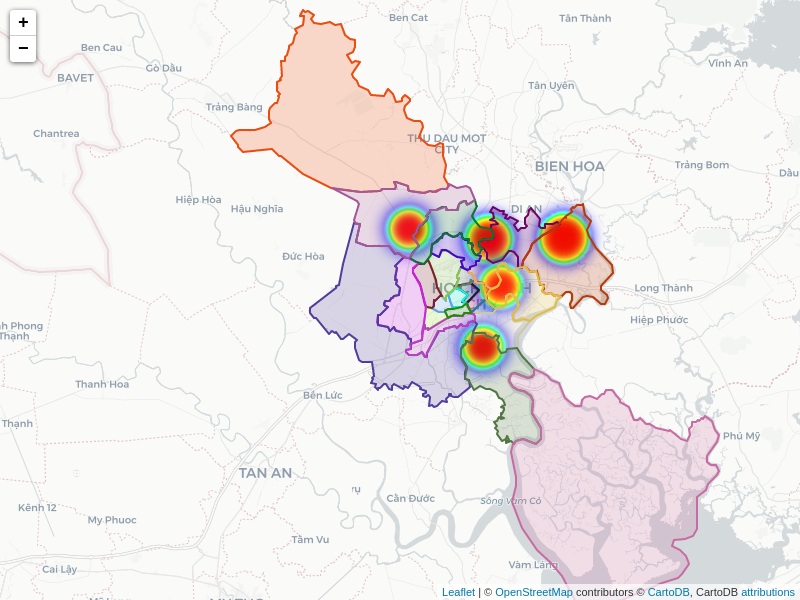

In [38]:
map_image = cv2.imread('map_image.png')
cv2_imshow(map_image)